# __Can You Trust Statistics__ 

## *Evaluating the accuracy of the 68/95/99.997 percent (empirical) rule*
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import math

print("np {}".format(np.__version__))
print("pd {}".format(pd.__version__))

np 1.20.0
pd 1.2.1


## __Generating Data__
---

In [5]:
sample  = np.round(np.random.normal(46, 4, 300))
sample

array([41., 46., 49., 47., 52., 44., 37., 45., 47., 43., 48., 50., 48.,
       47., 48., 49., 51., 38., 46., 43., 48., 45., 39., 51., 44., 46.,
       43., 51., 45., 51., 51., 41., 44., 54., 42., 42., 44., 50., 43.,
       49., 41., 43., 47., 42., 51., 47., 45., 40., 47., 45., 45., 51.,
       48., 40., 44., 48., 44., 40., 42., 42., 46., 46., 44., 53., 49.,
       42., 41., 51., 37., 46., 45., 48., 45., 40., 47., 50., 48., 40.,
       46., 41., 38., 48., 38., 45., 50., 52., 48., 43., 47., 38., 52.,
       40., 39., 47., 46., 49., 43., 38., 54., 48., 48., 42., 44., 45.,
       43., 44., 43., 49., 44., 43., 39., 43., 49., 40., 50., 44., 47.,
       46., 43., 42., 48., 49., 47., 46., 41., 49., 45., 46., 50., 46.,
       43., 39., 48., 53., 43., 50., 49., 43., 41., 42., 51., 48., 42.,
       44., 46., 44., 51., 44., 51., 48., 46., 52., 48., 44., 52., 42.,
       43., 49., 48., 47., 55., 47., 43., 49., 44., 45., 43., 41., 44.,
       47., 46., 49., 49., 42., 48., 43., 49., 49., 45., 51., 48

### Plotting samples

In [84]:
def plot_distro(data, step = 1):
    axis = np.arange(start=min(data), stop = max(data) + 1, step=step)
    plt.hist(data, bins = axis)

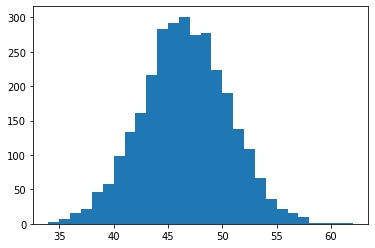

In [85]:
plot_distro(sample, step=1)

## __Empirical Rule Models__
---

### Brute force

In [26]:
from tqdm import tqdm
def brute_force(data, spread = 1.0):
    avg_count = len([
        x for x in tqdm(data) \
        if data.mean() - data.std() * spread < x < data.mean() + data.std() * spread
                    ])
    return avg_count/len(data)

In [27]:
brute_force(sample,1)

100%|██████████| 300/300 [00:00<00:00, 7128.81it/s]


0.6566666666666666

### Straigh up (Int Model)

In [13]:
r_map = [0.0,.68,.95,.997,.999]
def r_emp(spread = 1.0):
    if spread % 1.0 > 0.00001:
        return np.nan
    return r_map[int(spread)]

In [14]:
r_emp(10)

IndexError: list index out of range

In [15]:
r_emp(1.1)

nan

### Area under curve (Float Model)
---
Cumulative distribution function (CFD)  
  
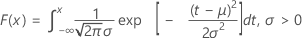

In [68]:
from scipy.stats import norm 

In [69]:
def emp(spread=1.0):
    mean = 0.0
    std = 1.0
    return norm.cdf(mean + spread*std, mean, std) - norm.cdf(mean - spread*std, mean, std)

In [70]:
emp(1.0)

0.6826894921370859

## __Testing__
---

### On generated data

In [55]:
def comparison_table(sample):
    data = []
    for epoch in np.arange(.2,3.4,0.2):
        data.append([epoch, brute_force(sample, epoch), r_emp(epoch), emp(epoch)])

    return pd.DataFrame(data, columns = ['N', 'Brute Force','INT Model', 'FL Model'])

def compute_accuracy(pdata):
    pdata['INT Diff'] = pdata['Brute Force'] - pdata['INT Model']
    pdata['FL Diff'] = pdata['Brute Force'] - pdata['FL Model'] 
    
    print(pdata)
    print("\nInt Accuracy: {}%".format(abs(pdata['INT Diff'].mean())*100))
    print("Float Accuracy: {}%".format(abs(pdata['FL Diff'].mean())*100))

100%|██████████| 3000/3000 [00:00<00:00, 11808.18it/s]


,N,Brute Force,INT Model,FL Model
0,0.2,0.100333,NaN,0.158519
1,0.4,0.289000,NaN,0.310843
2,0.6,0.476000,NaN,0.451494
3,0.8,0.622667,NaN,0.576289
4,1.0,0.686000,0.680,0.682689
5,1.2,0.739667,NaN,0.769861
6,1.4,0.830000,NaN,0.838487
7,1.6,0.898667,NaN,0.890401
8,1.8,0.940000,NaN,0.928139
9,2.0,0.952000,0.950,0.954500


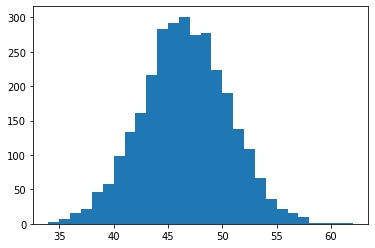

In [59]:
sample  = np.round(np.random.normal(46, 4, 3000))
plot_distro(sample)
    
pdata = comparison_table(sample)
pdata

In [60]:
compute_accuracy(pdata)

      N  Brute Force  INT Model  FL Model  INT Diff   FL Diff
0   0.2     0.100333        NaN  0.158519       NaN -0.058186
1   0.4     0.289000        NaN  0.310843       NaN -0.021843
2   0.6     0.476000        NaN  0.451494       NaN  0.024506
3   0.8     0.622667        NaN  0.576289       NaN  0.046377
4   1.0     0.686000      0.680  0.682689     0.006  0.003311
5   1.2     0.739667        NaN  0.769861       NaN -0.030194
6   1.4     0.830000        NaN  0.838487       NaN -0.008487
7   1.6     0.898667        NaN  0.890401       NaN  0.008265
8   1.8     0.940000        NaN  0.928139       NaN  0.011861
9   2.0     0.952000      0.950  0.954500     0.002 -0.002500
10  2.2     0.967333        NaN  0.972193       NaN -0.004860
11  2.4     0.981667        NaN  0.983605       NaN -0.001938
12  2.6     0.992000        NaN  0.990678       NaN  0.001322
13  2.8     0.997667        NaN  0.994890       NaN  0.002777
14  3.0     0.998000      0.997  0.997300     0.001  0.000700
15  3.2 

## __Getting Real Data__
---

In [2]:
rdata = pd.read_csv("avocado.csv")
rdata

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [62]:
rdata = rdata[['AveragePrice']]
rdata = rdata.dropna()
rdata

,AveragePrice
0,1.33
1,1.35
2,0.93
3,1.08
4,1.28
...,...
18244,1.63
18245,1.71
18246,1.87
18247,1.93


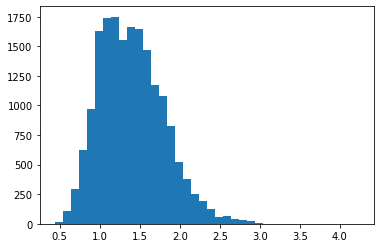

In [63]:
plot_distro(np.asarray(rdata['AveragePrice']), .1)

### Testing the real data

In [66]:
table = comparison_table(rdata["AveragePrice"])
table

100%|██████████| 18249/18249 [00:12<00:00, 1502.71it/s]


,N,Brute Force,INT Model,FL Model
0,0.2,0.144391,NaN,0.158519
1,0.4,0.283358,NaN,0.310843
2,0.6,0.422434,NaN,0.451494
3,0.8,0.552414,NaN,0.576289
4,1.0,0.673736,0.680,0.682689
5,1.2,0.785468,NaN,0.769861
6,1.4,0.855554,NaN,0.838487
7,1.6,0.908159,NaN,0.890401
8,1.8,0.942572,NaN,0.928139
9,2.0,0.961697,0.950,0.954500


In [67]:
compute_accuracy(table)

      N  Brute Force  INT Model  FL Model  INT Diff   FL Diff
0   0.2     0.144391        NaN  0.158519       NaN -0.014128
1   0.4     0.283358        NaN  0.310843       NaN -0.027485
2   0.6     0.422434        NaN  0.451494       NaN -0.029060
3   0.8     0.552414        NaN  0.576289       NaN -0.023875
4   1.0     0.673736      0.680  0.682689 -0.006264 -0.008954
5   1.2     0.785468        NaN  0.769861       NaN  0.015607
6   1.4     0.855554        NaN  0.838487       NaN  0.017067
7   1.6     0.908159        NaN  0.890401       NaN  0.017758
8   1.8     0.942572        NaN  0.928139       NaN  0.014433
9   2.0     0.961697      0.950  0.954500  0.011697  0.007197
10  2.2     0.973478        NaN  0.972193       NaN  0.001285
11  2.4     0.982794        NaN  0.983605       NaN -0.000811
12  2.6     0.987232        NaN  0.990678       NaN -0.003445
13  2.8     0.989534        NaN  0.994890       NaN -0.005356
14  3.0     0.992822      0.997  0.997300 -0.004178 -0.004479
15  3.2 

## The Realest of the realest
---

**500 real rolls of a dice pair done by me**

In [ ]:
data = pd.readcsv("dice.cvg")
data

In [ ]:
data["Sum"] = data["Die 1"] + data["Die 2"

NameError: name 'data' is not defined

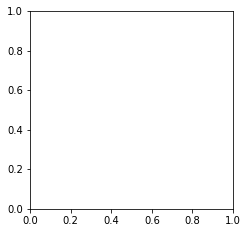

In [87]:
plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
plot_distro(data["Die 1"])
plt.title('Die 1')

plt.subplot(2,2,2)
plot_distro(data["Die 2"])
plt.title('Die 2')

plt.subplot(2,2,(3,4))
plot_distro(data["Sum"])
plt.title('Sum')

In [ ]:
table = comparison_table(data["Sum"])
table

In [ ]:
compute_accuracy(table)

## __Conclusion__
--- 
iunno, man